In [ ]:
!pip install openCV-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: generate code to import zip file from my drive

import zipfile

# Replace 'path/to/your/zipfile.zip' with the actual path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Dataset_Files/weather_classification.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/') # Extracts to the current working directory in Colab



In [ ]:
import os
import random
import shutil
from math import floor

# Define the paths to your dataset and where to store the split data
dataset_dir = '/content/dataset'
output_dir = 'train_test_split'

# Define split ratio
split_ratio = 0.8  # 80% train, 20% test

# Create train and test directories
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of classes (folder names), ignoring 'alien_test' and 'test.csv'
classes = [class_name for class_name in os.listdir(dataset_dir)
           if class_name != 'alien_test' and class_name != 'test.csv']

# Loop through each class folder and split the images
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)

    # Check if the current path is a directory
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files (e.g., test.csv)

    # Get a list of all files in the class folder, ignore non-image files
    images = [img for img in os.listdir(class_path)
              if os.path.isfile(os.path.join(class_path, img)) and img.endswith(('.png', '.jpg', '.jpeg'))]

    # Shuffle the images
    random.shuffle(images)

    # Split into train and test based on the split ratio
    split_index = floor(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Create subdirectories for each class in train and test directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move the training images to the train directory
    for image in train_images:
        src = os.path.join(class_path, image)
        dest = os.path.join(train_dir, class_name, image)
        shutil.copy(src, dest)  # Copy image to the train directory

    # Move the testing images to the test directory
    for image in test_images:
        src = os.path.join(class_path, image)
        dest = os.path.join(test_dir, class_name, image)
        shutil.copy(src, dest)  # Copy image to the test directory

print("Dataset split completed.")


Dataset split completed.


In [ ]:
cloudy = cv2.imread('/content/train_test_split/train/cloudy/cloudy1.jpg')
cloudy.shape

(400, 600, 3)

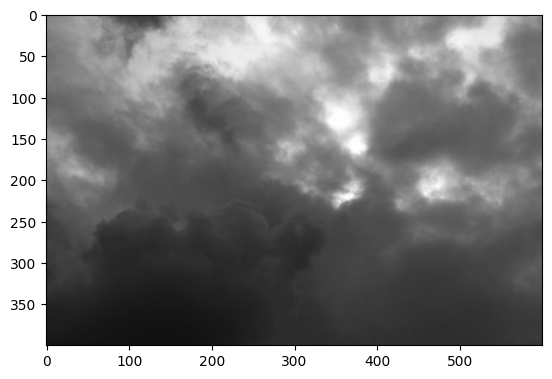

In [ ]:
plt.imshow(cloudy)

In [ ]:
# prompt: generate code so that i can see the shapes of train and test directories in  'train_test_split'

train_dir = '/content/train_test_split/train'
test_dir = '/content/train_test_split/test'

print("Train directory contents:")
for root, dirs, files in os.walk(train_dir):
    level = root.replace(train_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/ : {} files'.format(indent, os.path.basename(root), len(files)))

print("\nTest directory contents:")
for root, dirs, files in os.walk(test_dir):
    level = root.replace(test_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/ : {} files'.format(indent, os.path.basename(root), len(files)))


Train directory contents:
train/ : 0 files
    foggy/ : 240 files
    rainy/ : 240 files
    shine/ : 200 files
    cloudy/ : 240 files
    sunrise/ : 280 files

Test directory contents:
test/ : 0 files
    foggy/ : 60 files
    rainy/ : 60 files
    shine/ : 50 files
    cloudy/ : 60 files
    sunrise/ : 70 files


## Making a flow

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator class
image_gen = ImageDataGenerator()

train_img = image_gen.flow_from_directory('/content/train_test_split/train')

Found 1200 images belonging to 5 classes.


In [ ]:
test_img = image_gen.flow_from_directory('/content/train_test_split/test')

Found 300 images belonging to 5 classes.


In [ ]:
train_img.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

## Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 71, 71, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 33, 33, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,168,581 (8.27 MB)

 Trainable params: 2,168,581 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [ ]:
batch_size = 16
train_img_gen = image_gen.flow_from_directory('/content/train_test_split/train', target_size=(150,150), batch_size = 16, class_mode='categorical')

Found 1200 images belonging to 5 classes.


In [ ]:
test_img_gen = image_gen.flow_from_directory('/content/train_test_split/test', target_size=(150,150), batch_size = 16, class_mode='categorical')

Found 300 images belonging to 5 classes.


In [ ]:
results = model.fit(train_img_gen,
                  epochs=50,
                  steps_per_epoch=150,
                  validation_data=test_img_gen,
                  validation_steps=10
                  )

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/150 ━━━━━━━━━━━━━━━━━━━━ 1:57 800ms/step - accuracy: 0.2674 - loss: 168.2887

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-0d008306cf7c>", line 1, in <cell line: 1>
    results = model.fit(train_img_gen,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit
    logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 833, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polym

TypeError: object of type 'NoneType' has no len()

## Running Inference

In [ ]:
model.save('/content/drive/MyDrive/Computer_Vision/weather_classification_50epochs.h5.keras')

NameError: name 'model' is not defined

In [ ]:
import numpy as np
import h5py
import numpy as np
from keras.models import load_model
from tensorflow import keras

new_model = keras.models.load_model('/content/drive/MyDrive/Computer_Vision/weather_classification_50epochs.h5.keras')

In [ ]:
cloudy_file = '/content/train_test_split/train/cloudy/cloudy1.jpg'

In [ ]:
from keras.preprocessing import image
cloudy_img = image.load_img(cloudy_file, target_size=(150,150))

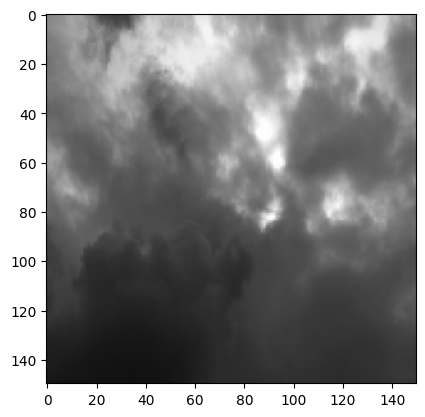

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cloudy_img)

In [ ]:
cloudy_img = image.img_to_array(cloudy_img)

In [ ]:
import numpy as np
cloudy_img = np.expand_dims(cloudy_img, axis=0)

In [ ]:
cloudy_img.shape

(1, 150, 150, 3)

In [ ]:
prediction_prob = new_model.predict(cloudy_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


In [ ]:
print(prediction_prob)

[[9.9969101e-01 6.6432367e-06 3.0156370e-04 8.7525751e-07 3.7559311e-10]]


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess your test image (adjust the path accordingly)
img_path = '/content/dataset/alien_test/foggy_1.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add a batch dimension

# Use model to make predictions
predictions = new_model.predict(img)

# Apply a threshold (e.g., 0.5) to get the predicted class label
predicted_class = np.argmax(predictions).astype(int)#[0][0]

if predicted_class == 0:
    print("Predicted class: cloudy")
elif predicted_class == 1:
    print("Predicted class: foggy")
elif predicted_class == 2:
    print("Predicted class: rainy")
elif predicted_class == 3:
    print("Predicted class: shine")
elif predicted_class == 4:
    print("Predicted class: sunrise")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: foggy


## Applying VGG16

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define directories for train and test data
train_dir = '/content/train_test_split/train'
test_dir = '/content/train_test_split/test'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 16

# Create data generators for train and test data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new sequential model
model = Sequential()

# Add the VGG16 base model
model.add(base_model)

# Flatten the output of the VGG16 base model
model.add(Flatten())

# Add custom top layers for classification
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    #validation_data=test_generator,
                    validation_steps=len(test_generator))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

Found 1200 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.4121 - loss: 1.4165
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 126us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 0.7212 - loss: 0.7463
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 332s 4s/step - accuracy: 0.7835 - loss: 0.5915
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 386s 4s/step - accuracy: 0.8435 - loss: 0.4780
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 333s 4s/step - accuracy: 0.8691 - loss: 0.4054
Epoch 10/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 86us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.8777 - loss: 0.3467
Test accuracy: 0.8566666841506958
